### Importing necessary libraries and dataset

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for data preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from sklearn import metrics  # For model evaluation metrics
from sklearn.svm import SVC  # Support Vector Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression

# Suppress warning messages for a cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading the dataset
df = pd.read_csv('winequalityN.csv')
# to display the top 5 rows
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

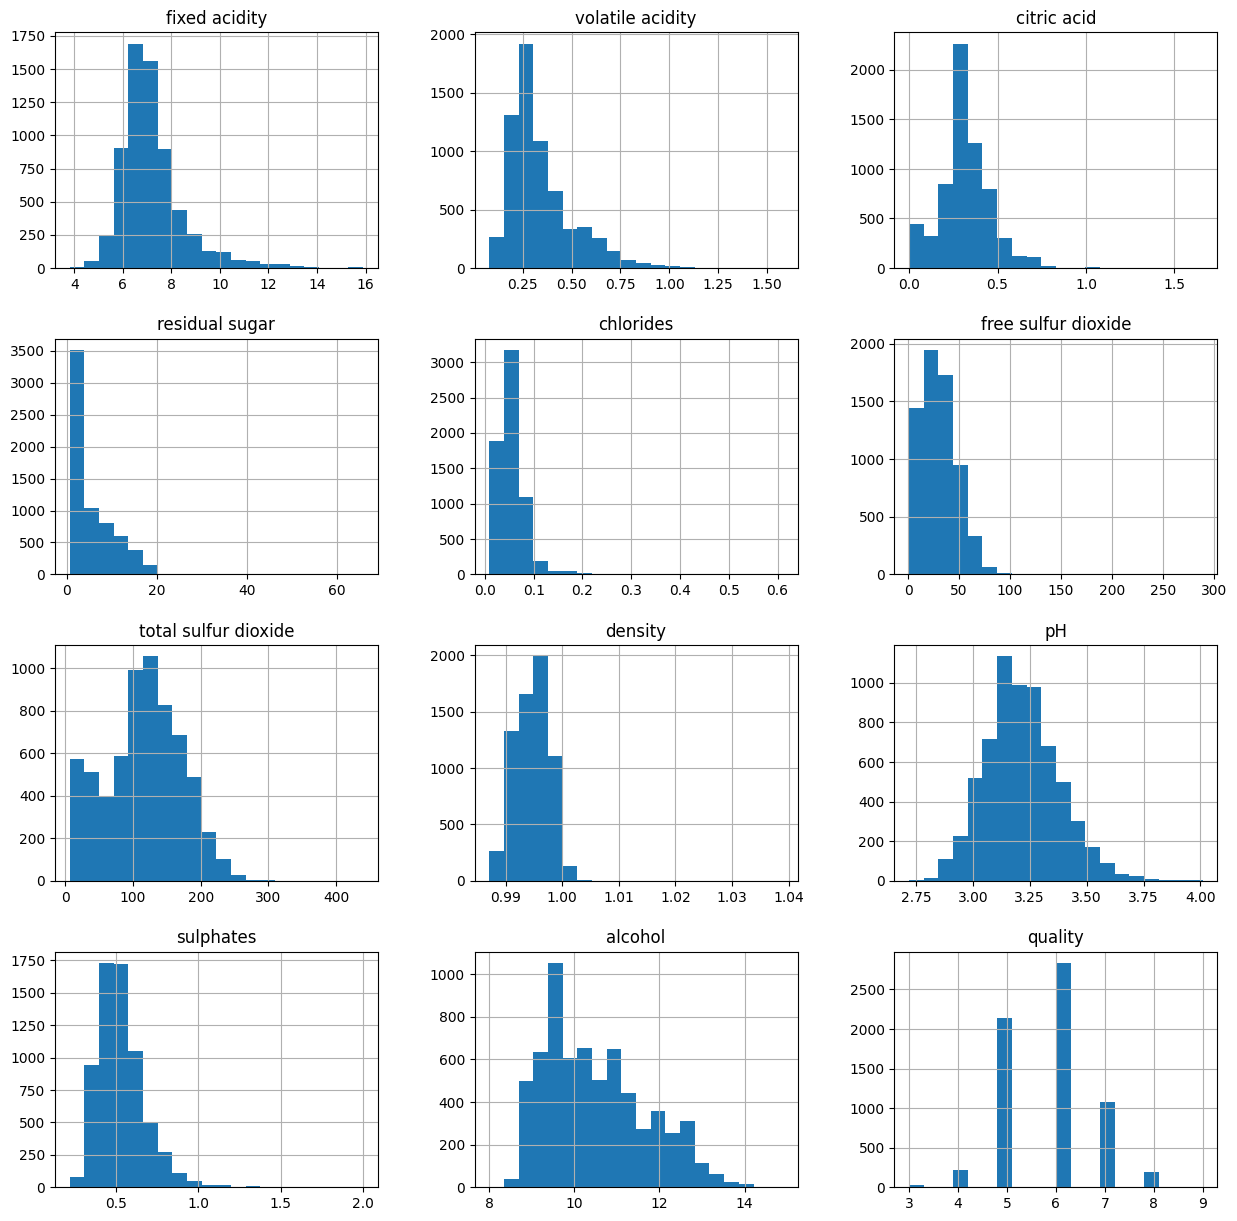

In [7]:
df.hist(figsize=(15,15),bins=20)
plt.show()

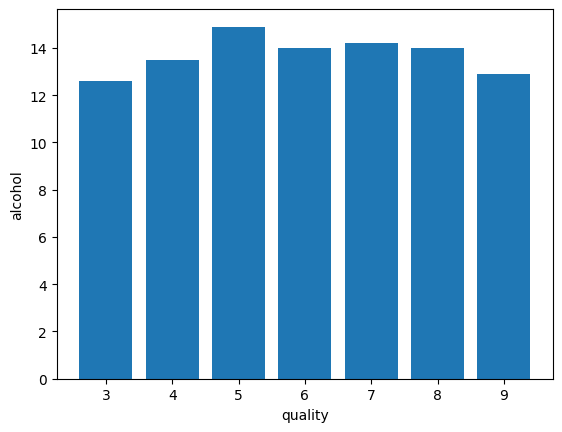

In [8]:
# Create a bar chart to visualize the relationship between 'quality' and 'alcohol'
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [9]:
# changing categorical data to numerical data
df.replace({'white':1,'red':0},inplace=True)

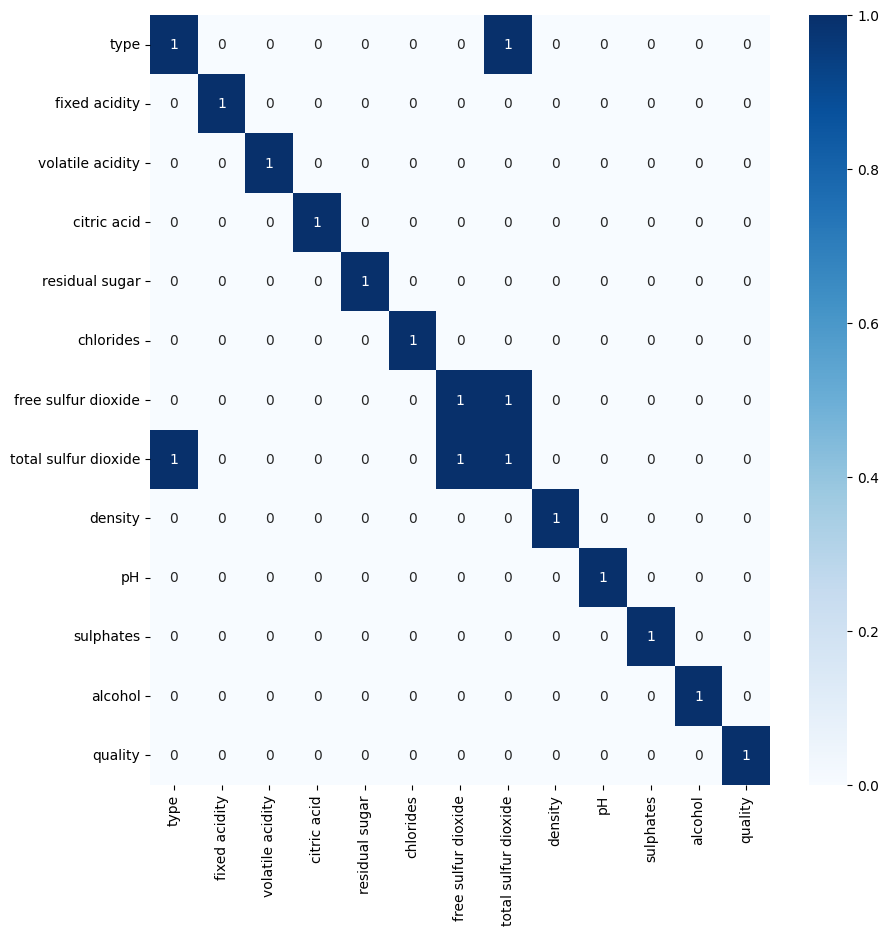

In [10]:
# plotting heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.7, annot = True, cmap='Blues')
plt.show()

In [11]:
# drop the columns which are highly correlated with each other here total sulfur dioxide and free sulfur dioxide are highly correlated
df = df.drop('total sulfur dioxide',axis=1)

In [12]:
# creating new column for best quality wine with values 1 and 0 
df['best quality'] = [1 if x>5 else 0 for x in df['quality']]

In [13]:
# Extract features (independent variables) by dropping 'quality' and 'best quality' columns
features = df.drop(['quality', 'best quality'], axis=1)

# Extract the target variable ('best quality')
target = df['best quality']

# Split the data into training and testing sets
# - x_train: Features for training
# - x_test: Features for testing
# - y_train: Target values for training
# - y_test: Target values for testing
# - test_size: The proportion of data to use for testing (20% in this case)
# - random_state: Seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to check the split
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of x_train: (5197, 11)
Shape of x_test: (1300, 11)
Shape of y_train: (5197,)
Shape of y_test: (1300,)


In [14]:
# Create a Min-Max Scaler instance
scaler = MinMaxScaler()

# Scale (normalize) the features in the training data
x_train = scaler.fit_transform(x_train)

# Scale (normalize) the features in the test data using the same scaler
x_test = scaler.transform(x_test)


0 model name: LogisticRegression
accuracy score: 0.7507692307692307
confusion matrix: [[278 190]
 [134 698]]
classification report:               precision    recall  f1-score   support

           0       0.67      0.59      0.63       468
           1       0.79      0.84      0.81       832

    accuracy                           0.75      1300
   macro avg       0.73      0.72      0.72      1300
weighted avg       0.75      0.75      0.75      1300

Training ROC AUC score: 0.7006846212042639
Testing ROC AUC score: 0.7164797008547008


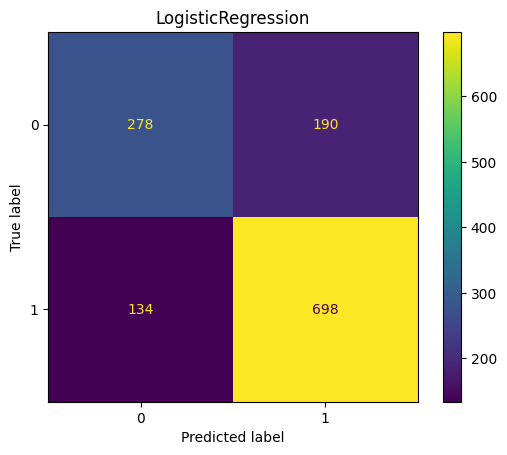

-----------------------------------------------------------
1 model name: XGBClassifier
accuracy score: 0.8284615384615385
confusion matrix: [[360 108]
 [115 717]]
classification report:               precision    recall  f1-score   support

           0       0.76      0.77      0.76       468
           1       0.87      0.86      0.87       832

    accuracy                           0.83      1300
   macro avg       0.81      0.82      0.81      1300
weighted avg       0.83      0.83      0.83      1300

Training ROC AUC score: 0.9756161559023644
Testing ROC AUC score: 0.8155048076923077


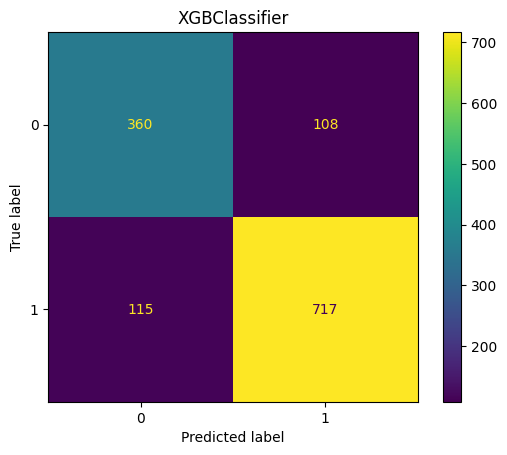

-----------------------------------------------------------
2 model name: SVC
accuracy score: 0.7546153846153846
confusion matrix: [[264 204]
 [115 717]]
classification report:               precision    recall  f1-score   support

           0       0.70      0.56      0.62       468
           1       0.78      0.86      0.82       832

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.75      1300

Training ROC AUC score: 0.7049784964230699
Testing ROC AUC score: 0.7129407051282052


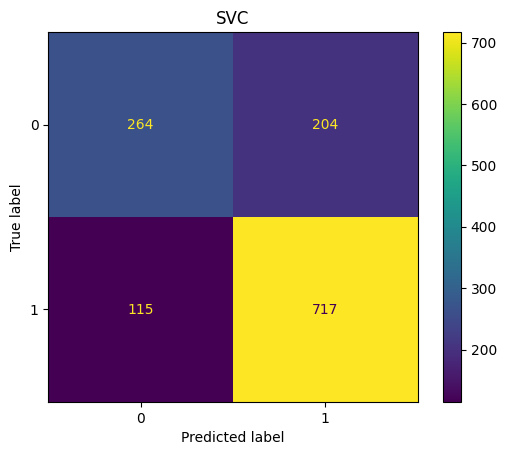

-----------------------------------------------------------


In [15]:
# Define a list of machine learning models to be evaluated
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

# Define names for the models for easier identification in output
model_names = ['LogisticRegression', 'XGBClassifier', 'SVC']

# Loop through each model
for i in range(3):
    # Fit the current model on the training data
    models[i].fit(x_train, y_train)
    
    # Make predictions on the test data
    predict_x = models[i].predict(x_test)
    
    # Print the model name for identification
    print(f'{i} model name: {model_names[i]}')
    
    # Print accuracy score
    print(f'accuracy score: {metrics.accuracy_score(y_test, predict_x)}')
    
    # Print confusion matrix
    print(f'confusion matrix: {metrics.confusion_matrix(y_test, predict_x)}')
    
    # Print classification report
    print(f'classification report: {metrics.classification_report(y_test, predict_x)}')
    
    # Print training and testing ROC AUC scores
    print(f'Training ROC AUC score: {metrics.roc_auc_score(y_train, models[i].predict(x_train))}')
    print(f'Testing ROC AUC score: {metrics.roc_auc_score(y_test, predict_x)}')
    
    # Display the confusion matrix as a heatmap
    metrics.ConfusionMatrixDisplay.from_estimator(models[i], x_test, y_test)
    
    # Set the title for the heatmap
    plt.title(model_names[i])
    
    # Show the heatmap
    plt.show()
    
    # Add a separator for better readability
    print('-----------------------------------------------------------')



"Upon evaluating the performance of various models on our dataset, it is evident that both Logistic Regression and Support Vector Classifier (SVC) are performing well when compared to the XGBoost model. However, it's worth noting that the XGBoost model appears to exhibit signs of overfitting, which may be addressed through the application of regularization techniques."

In [16]:
#with l1 regularization
model = XGBClassifier(objective='binary:logistic',reg_alpha=0.1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print(f'Training accuracy: {metrics.roc_auc_score(y_train,model.predict(x_train))}')
print(f'Testing accuracy: {metrics.roc_auc_score(y_test,prediction)}')

Training accuracy: 0.9777038385745982
Testing accuracy: 0.8110977564102564


In [17]:
#with l2 regularization
model = XGBClassifier(objective='binary:logistic',reg_lambda=0.1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print(f'Training accuracy: {metrics.roc_auc_score(y_train,model.predict(x_train))}')
print(f'Testing accuracy: {metrics.roc_auc_score(y_test,prediction)}')

Training accuracy: 0.9841860105535826
Testing accuracy: 0.8127003205128205


In [18]:
#with both l1 and l2 regularization
model = XGBClassifier(objective='binary:logistic',reg_alpha=0.1,reg_lambda=0.1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print(f'Training accuracy: {metrics.roc_auc_score(y_train,model.predict(x_train))}')
print(f'Testing accuracy: {metrics.roc_auc_score(y_test,prediction)}')

Training accuracy: 0.9840983609686694
Testing accuracy: 0.818709935897436


"After using L1 and L2 parameters, there is still overfitting" – This accurately identifies that regularization alone may not solve the overfitting problem.

"Simplifying the Model: Use a simpler model with fewer parameters" – This is a valid suggestion. Sometimes, overfitting can occur due to an overly complex model that fits the noise in the data.

"More Data: If possible, gather more training data to help the model generalize better" – This is also a good suggestion. More data can help the model generalize better and reduce overfitting.

Considerations:

"But this is not necessary that all models will work for any task" – This is true. Different machine learning algorithms and models work differently for different tasks. It's essential to choose the right model for the specific problem you're trying to solve.
